<a href="https://colab.research.google.com/github/anushkapatwa/CSCI-167-Project/blob/main/167project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf # Core deep learning framework for building and training neural networks
from tensorflow.keras import datasets, layers, models # Keras API for dataset loading, layer definitions, and model creation
import matplotlib.pyplot as plt # Plotting library for visualizing training results and predictions

In [ ]:
#loads CIFAR-10 dataset
#50,000 training images, 10,000 test images, 32x32 color
# Each image is 32x32 pixels with 3 color channels (RGB)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalize the pixel values to [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

# Display the shape of datasets to verify correct loading
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [ ]:
# Create data augmentation pipeline to artificially expand training dataset
# Augmentation helps model learn invariance to transformations and reduces overfitting
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),  # Randomly flip images left-to-right with 50% probability
    layers.RandomRotation(0.1),       # Randomly rotate images by up to ±10% of full rotation (±36 degrees)
])

# Build improved CNN model with batch normalization and dropout regularization
model = models.Sequential([
    # Input layer: accepts 32x32 RGB images
    layers.Input(shape=(32, 32, 3)),

    # Apply data augmentation during training only (automatically disabled during inference)
    data_augmentation,

    # First convolutional block: extract low-level features (edges, textures)
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),  # 32 filters with 3x3 kernels, maintain spatial dimensions
    layers.BatchNormalization(),  # Normalize activations to stabilize training and accelerate convergence
    layers.MaxPooling2D((2, 2)),  # Downsample spatial dimensions by 2x (32x32 → 16x16)

    # Second convolutional block: extract mid-level features (object parts, patterns)
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),  # 64 filters for richer feature representations
    layers.BatchNormalization(),  # Stabilize gradients and reduce internal covariate shift
    layers.MaxPooling2D((2, 2)),  # Downsample to 8x8 spatial dimensions

    # Third convolutional block: extract high-level features (complete objects, complex structures)
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),  # 128 filters for deep feature extraction
    layers.BatchNormalization(),  # Continue gradient stabilization in deeper layers
    layers.MaxPooling2D((2, 2)),  # Downsample to 4x4 spatial dimensions

    # Flatten feature maps into 1D vector for fully connected layers
    layers.Flatten(),  # Convert 3D feature maps (4x4x128) to 1D vector (2048 features)

    # Dense classification layers
    layers.Dense(128, activation='relu'),  # Fully connected layer for high-level reasoning
    layers.Dropout(0.5),  # Randomly drop 50% of neurons during training to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer: 10 neurons for 10 CIFAR-10 classes with probability distribution
])

# Display model architecture with layer details, output shapes, and parameter counts
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
# Adam provides adaptive learning rates for faster convergence
# Sparse categorical crossentropy is used because labels are integers (0-9) rather than one-hot encoded
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model on CIFAR-10 dataset
EPOCHS = 6  # Number of complete passes through the training dataset

# Fit model and store training history (loss and accuracy curves)
history = model.fit(
    train_images, train_labels,  # Training data and corresponding labels
    epochs=EPOCHS,
    batch_size=64,  # Process 64 images per gradient update
    validation_data=(test_images, test_labels)  # Evaluate on test set after each epoch
)

Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 221ms/step - accuracy: 0.3095 - loss: 1.9611 - val_accuracy: 0.4940 - val_loss: 1.3945
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 216ms/step - accuracy: 0.4560 - loss: 1.5024 - val_accuracy: 0.4392 - val_loss: 1.8981
Epoch 3/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 217ms/step - accuracy: 0.5283 - loss: 1.3242 - val_accuracy: 0.6009 - val_loss: 1.1281
Epoch 4/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.5647 - loss: 1.2351 - val_accuracy: 0.6196 - val_loss: 1.0598
Epoch 5/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 216ms/step - accuracy: 0.5954 - loss: 1.1546 - val_accuracy: 0.6639 - val_loss: 1.0086
Epoch 6/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 209ms/step - accuracy: 0.6215 - loss: 1.0879 - val_accuracy: 0.6347 - val_loss: 1.0431


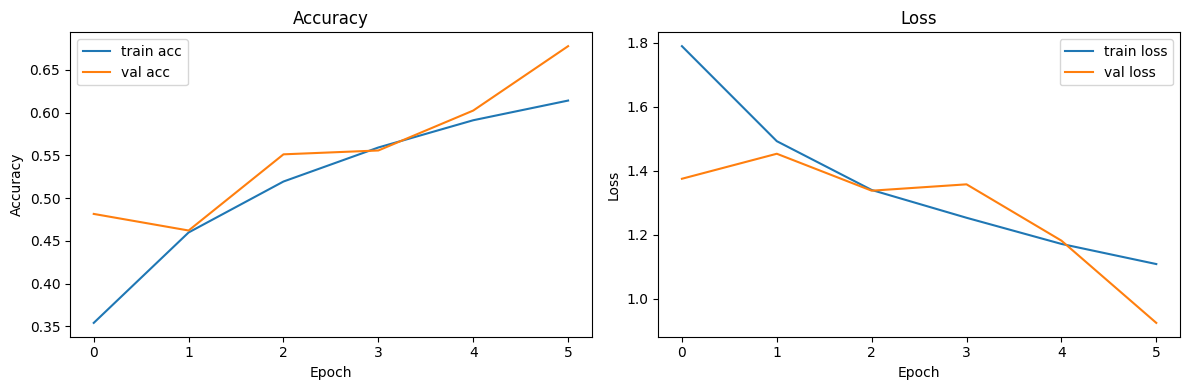

In [ ]:
# Visualize training progress with accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot accuracy over epochs (left subplot)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot loss over epochs (right subplot)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Second architecture: MobileNetV2 transfer learning approach
# Leverages pretrained ImageNet weights for improved performance on CIFAR-10

from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 pretrained on ImageNet as feature extractor
base_model = MobileNetV2(
    input_shape=(96, 96, 3),  # MobileNetV2 expects larger input than CIFAR-10's 32x32
    include_top=False,  # Exclude original classification head (1000 ImageNet classes)
    weights='imagenet'  # Use pretrained weights from ImageNet dataset
)
base_model.trainable = False  # Freeze base model weights to retain learned features and speed up training

# Build complete transfer learning model with custom classification head
transfer_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Accept original CIFAR-10 image size
    data_augmentation,  # Apply same augmentation strategy as improved CNN
    layers.Resizing(96, 96),  # Upsample CIFAR-10 images to match MobileNetV2 input requirements

    base_model,  # Pretrained feature extractor (frozen)
    layers.GlobalAveragePooling2D(),  # Reduce spatial dimensions to single feature vector
    layers.Dense(128, activation='relu'),  # Fully connected layer for classification
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 CIFAR-10 classes
])

transfer_model.summary()

# Compile with lower learning rate since we're fine-tuning on pretrained features
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Smaller learning rate for transfer learning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the transfer learning model
EPOCHS_TL = 10  # More epochs may improve performance but increase training time
history_tl = transfer_model.fit(
    train_images, train_labels,
    epochs=EPOCHS_TL,
    batch_size=64,
    validation_data=(test_images, test_labels)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 426s 537ms/step - accuracy: 0.2975 - loss: 2.0569 - val_accuracy: 0.6557 - val_loss: 1.0185
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 444s 540ms/step - accuracy: 0.5156 - loss: 1.3855 - val_accuracy: 0.6986 - val_loss: 0.8744
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 417s 533ms/step - accuracy: 0.5630 - loss: 1.2573 - val_accuracy: 0.7160 - val_loss: 0.8137
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 448s 541ms/step - accuracy: 0.5922 - loss: 1.1812 - val_accuracy: 0.7293 - val_loss: 0.7717
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 404s 516ms/step - accuracy: 0.6062 - loss: 1.1352 - val_accuracy: 0.7395 - val_loss: 0.7484
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 421s 538ms/step - accuracy: 0.6191 - loss: 1.0917 - val_accuracy: 0.7469 - val_loss: 0.7307
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 425s 517ms/step - accuracy: 0.6271 - loss: 1.0717 - val_accuracy: 0.7502 - val_loss: 0.7188
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 460s 540ms/step - accuracy: 0.6347 -

In [ ]:
# Hyperparameter experiment: Compare Adam vs SGD optimizers
# Both use identical CNN architecture to isolate optimizer impact on training

# Function to create improved CNN architecture for consistent comparison
def build_improved_cnn():
    """Builds the improved CNN with batch normalization and dropout"""
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        data_augmentation,

        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Experiment 1: Train with Adam optimizer (adaptive learning rates)
cnn_adam = build_improved_cnn()
cnn_adam.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Adaptive learning rate per parameter
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_adam = cnn_adam.fit(
    train_images, train_labels,
    epochs=6,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=1
)

# Experiment 2: Train with SGD optimizer (fixed learning rate with momentum)
cnn_sgd = build_improved_cnn()
cnn_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),  # Classical gradient descent with momentum
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_sgd = cnn_sgd.fit(
    train_images, train_labels,
    epochs=6,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=1
)


Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 209ms/step - accuracy: 0.3064 - loss: 1.9744 - val_accuracy: 0.4866 - val_loss: 1.3979
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 203ms/step - accuracy: 0.4517 - loss: 1.5106 - val_accuracy: 0.5482 - val_loss: 1.2843
Epoch 3/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 207ms/step - accuracy: 0.5198 - loss: 1.3465 - val_accuracy: 0.5806 - val_loss: 1.1919
Epoch 4/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 203ms/step - accuracy: 0.5596 - loss: 1.2388 - val_accuracy: 0.5645 - val_loss: 1.2036
Epoch 5/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 202ms/step - accuracy: 0.5904 - loss: 1.1673 - val_accuracy: 0.6426 - val_loss: 1.0151
Epoch 6/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 209ms/step - accuracy: 0.6136 - loss: 1.1072 - val_accuracy: 0.4466 - val_loss: 1.8099
Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 203ms/step - accuracy: 0.2797 - loss: 2.0351 - val_accuracy: 0.4538 - val_loss: 1.5072
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 204ms/step - accuracy: 0.4044 - loss: 1

In [ ]:
# Compare final validation accuracy between Adam and SGD optimizers
adam_val_acc = history_adam.history['val_accuracy'][-1]  # Extract last epoch's validation accuracy for Adam
sgd_val_acc = history_sgd.history['val_accuracy'][-1]    # Extract last epoch's validation accuracy for SGD

print(f"Improved CNN + Adam  - final val accuracy: {adam_val_acc:.4f}")
print(f"Improved CNN + SGD   - final val accuracy: {sgd_val_acc:.4f}")


Improved CNN + Adam  - final val accuracy: 0.4466
Improved CNN + SGD   - final val accuracy: 0.6416


Best model test accuracy: 0.7610999941825867
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 424ms/step


<Figure size 800x800 with 0 Axes>

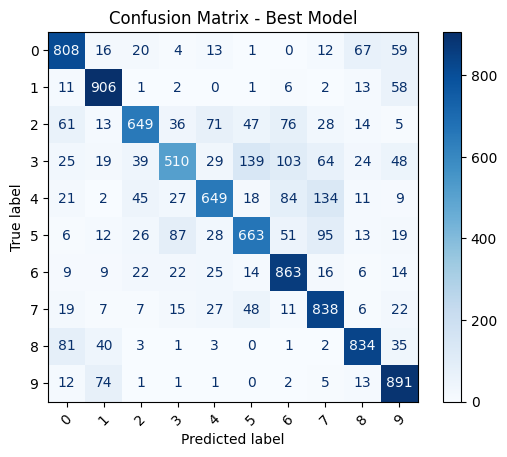

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Select the best performing model for final evaluation
best_model = transfer_model   # Replace with cnn_adam or cnn_sgd if they performed better

# Evaluate final test accuracy on unseen test set
test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=0)
print("Best model test accuracy:", test_acc)

# Generate predictions and compute confusion matrix
y_true = test_labels.flatten()  # True labels as 1D array
y_prob = best_model.predict(test_images, batch_size=64)  # Predicted probabilities for all classes
y_pred = np.argmax(y_prob, axis=1)  # Convert probabilities to class predictions (0-9)

cm = confusion_matrix(y_true, y_pred)  # Compute 10x10 confusion matrix

# Visualize confusion matrix to identify misclassification patterns
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d', cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Best Model")
plt.show()


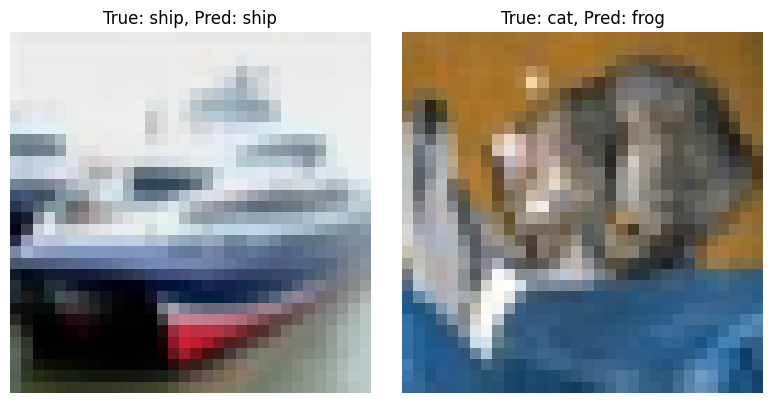

In [ ]:
# Visualize example predictions to qualitatively assess model performance
# CIFAR-10 class names in order (labels 0-9)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def show_example(idx):
    """Display a single test image with true and predicted labels"""
    plt.imshow(test_images[idx])
    plt.axis('off')
    true_label = class_names[int(y_true[idx])]
    pred_label = class_names[int(y_pred[idx])]
    plt.title(f"True: {true_label}, Pred: {pred_label}")

# Find indices of correct and incorrect predictions
correct_idxs = np.where(y_true == y_pred)[0]  # Correctly classified images
wrong_idxs   = np.where(y_true != y_pred)[0]  # Misclassified images

# Display one correct and one incorrect prediction for comparison
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
show_example(correct_idxs[0])  # Example of successful classification

plt.subplot(1,2,2)
show_example(wrong_idxs[0])  # Example of misclassification (reveals model weaknesses)

plt.tight_layout()
plt.show()


In [ ]:
# Import Keras datasets module for loading CIFAR-10
from tensorflow.keras import datasets

# Load CIFAR-10 dataset (50,000 training images, 10,000 test images, 32x32 RGB)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values from [0, 255] to [0, 1] for better neural network training
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


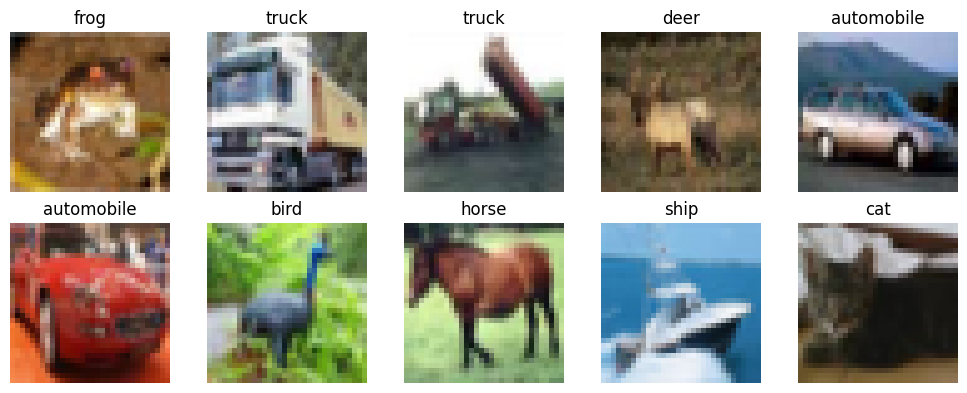

In [ ]:
# Visualize sample images from CIFAR-10 dataset for presentation purposes
# Displays one example from each of the 10 classes
import matplotlib.pyplot as plt

# CIFAR-10 class names corresponding to labels 0-9
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Create a 2x5 grid showing first 10 training images with their labels
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i])  # Display image
    plt.title(class_names[train_labels[i][0]])  # Show corresponding class name
    plt.axis('off')  # Hide axis for cleaner visualization
plt.tight_layout()
plt.show()